In [1]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

In [2]:
core_env = PendulumGymWrapper(gym.make('Pendulum-v1', render_mode='human'))
env = init_wrappers(core_env)

Observing state without wrappers


In [4]:
agent = SAC('MlpPolicy', env, verbose=1)
agent.learn(10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.34e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 43        |
|    time_elapsed    | 18        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 22.2      |
|    critic_loss     | 0.156     |
|    ent_coef        | 0.811     |
|    ent_coef_loss   | -0.344    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.25e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 38        |
|    time_elapsed    | 42        |
|    total_timesteps | 1600    

In [ ]:
agent, core = train_default_sac

Observing state without wrappers
Rescaling action
Rescaling observation
For delay 6, the episode reward is -1485.216412873974


<Figure size 640x480 with 0 Axes>

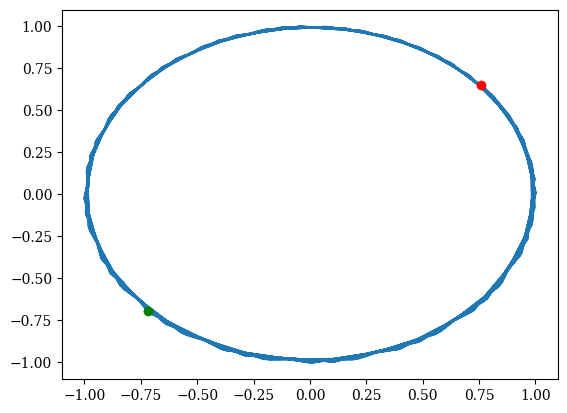

<Figure size 640x480 with 0 Axes>

In [17]:
# Test and render
terminated, truncated = False,False
core_env = PendulumGymWrapper(gym.make('Pendulum-v1'))
env = init_wrappers(core_env)
delay = 6

delay_informed_agent = DelayInformedAgent(agent, copy.deepcopy(env), init_delay = delay)
env = DelayAction(env, delay = delay)
env = AugmentState(env, known_delay = delay)

observations = []
obs, info = env.reset()
# print(f"Initial obs is {obs}")
episode_reward = 0
while not terminated and not truncated:
    # print(f"Outside loop: env state is {env.unwrapped.state}")
    action, _states = delay_informed_agent.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    observations.append(obs)
    episode_reward += reward
    # env.render()
env.close()
print(f"For delay {env.delay}, the episode reward is {episode_reward}")
plt.plot( np.array(observations)[:,1], np.array(observations)[:,0])
plt.plot(np.array(observations)[0,1], np.array(observations)[0,0], 'ro')
plt.plot(np.array(observations)[-1,1], np.array(observations)[-1,0], 'go')
plt.figure()


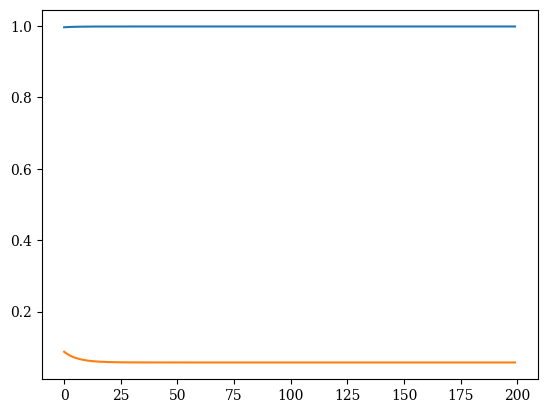

In [93]:
plt.plot(np.array(observations)[:,0])
plt.plot(np.array(observations)[:,1])

In [167]:
core_env = PendulumGymWrapper(gym.make('Pendulum-v1'))
pend_agent, pend_env = train_default_sac(core_env = core_env, total_timesteps = 40000, desired_state=1.0)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/PendulumEnv/state/fixed/0609/Desired1.0/sac
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.53e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 18        |
|    time_elapsed    | 43        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 22.7      |
|    critic_loss     | 0.226     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.49e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 22        |
|    time_elapsed    | 70        |


In [168]:
core_env = PendulumGymWrapper(gym.make('Pendulum-v1'))
res = train_default_augmented_sac(core_env = core_env,
                                   total_timesteps = 70000,
                                     seed = 42,
                                     desired_state=1.1, 
                                     agent_type = 'wcsac')

Observing state without wrappers
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Replay buffer class <class 'buffer.ExtendedBuffer'>
Env state space (13,) and action space (1,)
Logging to logs/train/PendulumEnv/state/fixed/0609/Desired1.1/wcsac


c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state_space_violation to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state_space_violation` for environment variables or `env.get_wrapper_attr('state_space_violation')` that will search the reminding wrappers.
  logger.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.22e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 15        |
|    time_elapsed    | 52        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 20.1      |
|    critic_loss     | 0.335     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.26e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 14        |
|    time_elapsed    | 110       |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 44.6      |
|    critic_loss     | 0.606     |
|    ent_coef       

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\PendulumEnv\state\fixed\Desired1.1' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.delay_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.delay_history` for environment variables or `env.get_wrapper_attr('delay_history')` that will search the reminding wrappers.
  logger.warn(
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.desired_states_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desired_states_history` for environment va

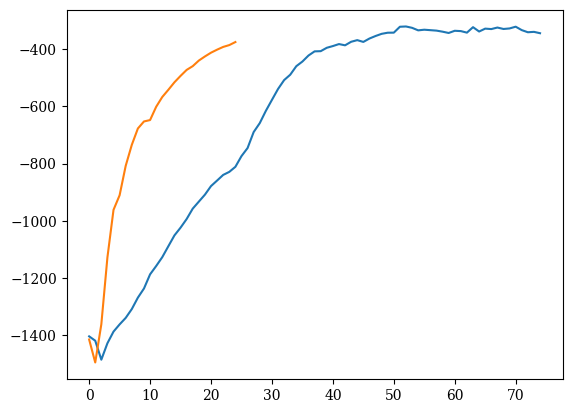

In [124]:
df = pd.read_csv('logs\\train\\PendulumEnv\\state\\fixed\\0609\\Desired0.8\\wcsac\\progress.csv')
plt.plot(df['rollout/ep_rew_mean'])
df = pd.read_csv('logs\\train\\PendulumEnv\\state\\fixed\\0608\\Desired0.8\\sac\\progress.csv')
plt.plot(df['rollout/ep_rew_mean'])


In [53]:
np.unique(np.array(res[2]), return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([26, 30, 23, 38, 33, 29, 21, 24, 23, 18, 36], dtype=int64))

Observing state without wrappers
Rescaling action
Rescaling observation
For delay 6, the episode reward is -130.65533135741782


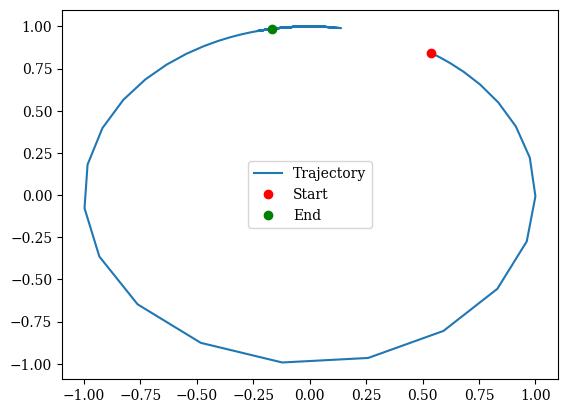

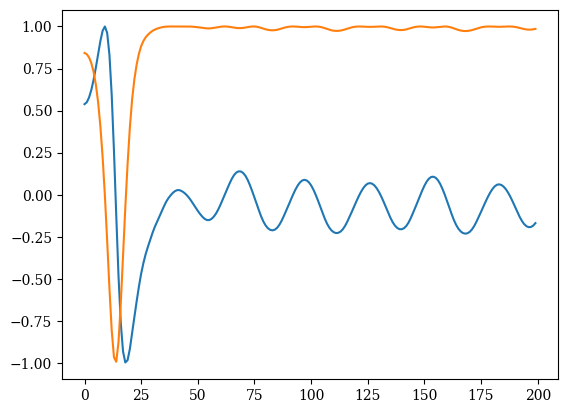

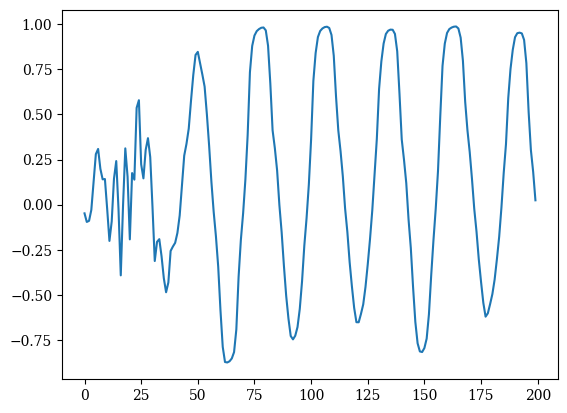

In [27]:
# Test and render
safe_agent = SAC.load('models\\PendulumEnv\\state\\fixed\\Desired1.0\\wcsac.zip')
agent = SAC.load('models\\PendulumEnv\\state\\fixed\\Desired1.0\\sac.zip')
terminated, truncated = False,False
core_env = PendulumGymWrapper(gym.make('Pendulum-v1'))
env = init_wrappers(core_env)
delay = 6

delay_informed_agent = DelayInformedAgent(agent, copy.deepcopy(env), init_delay = delay)
# safe_agent = res[0]
env = DelayAction(env, delay = delay)
env = AugmentState(env)

observations = []
states = []
actions = []
obs, info = env.reset()
# print(f"Initial obs is {obs}")
episode_reward = 0
while not terminated and not truncated:
    # print(f"Outside loop: env state is {env.unwrapped.state}")
    action, _states = safe_agent.predict(obs, deterministic=True)
    states.append(env.unwrapped.state[0])
    # action, _states = delay_informed_agent.predict(obs, deterministic=True)
    actions.append(action)
    obs, reward, terminated, truncated, info = env.step(action)
    observations.append(obs)
    episode_reward += reward
    # env.render()
env.close()
print(f"For delay {env.delay}, the episode reward is {episode_reward}")
end = 50
plt.plot( np.array(observations)[:,1], np.array(observations)[:,0])
plt.plot(np.array(observations)[0,1], np.array(observations)[0,0], 'ro')
plt.plot(np.array(observations)[-1,1], np.array(observations)[-1,0], 'go')
# plt.plot(np.array(observations)[:,1])
plt.legend(['Trajectory', 'Start', 'End'])
plt.figure()
plt.plot(np.array(observations)[:,1])
plt.plot(np.array(observations)[:,0])
plt.figure()
plt.plot(np.array(actions))
# plt.plot(np.array(states))